TASK 3 - BUILD A SIMPLE LINEAR REGRESSION MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset from the URL

data = pd.read_csv('https://www.statlearning.com/s/Advertising.csv')
data.head()


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Preprocessing

X = data[['TV']]  # Feature
y = data['sales']  # Target


In [5]:
#Split the Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#Train the Linear Regression Model

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [7]:
# Predict on Test Data

y_pred = model.predict(X_test)


In [8]:
#Evaluate the Model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 10.204654118800956
R-squared: 0.6766954295627076


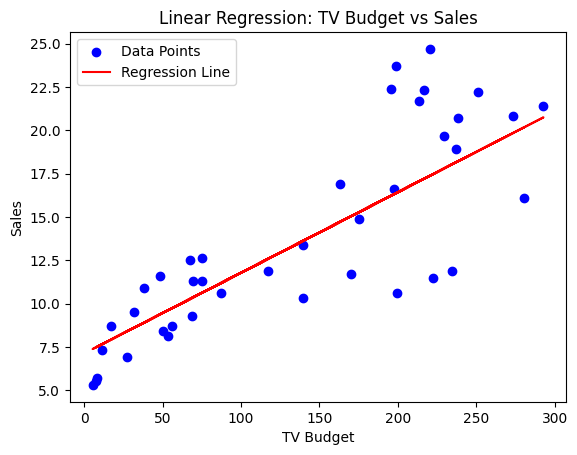

In [9]:
#Visualize the Regression Line

plt.scatter(X_test, y_test, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.title('Linear Regression: TV Budget vs Sales')
plt.legend()
plt.show()


#EXTRA

In [10]:
#RESIDUAL ANALYSIS

#Calculate Residual
residuals = y_test - y_pred


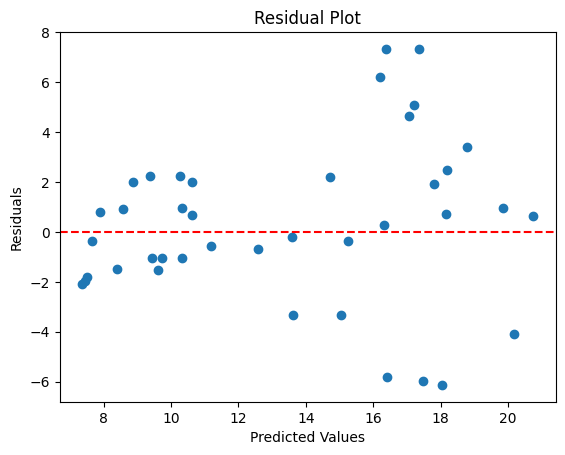

In [11]:
#Residual Plot: This plot helps identify patterns in the residuals that might indicate problems like heteroscedasticity or non-linearity.

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


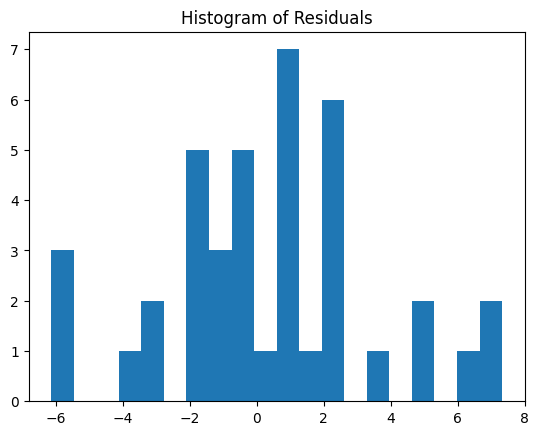

In [13]:
#Histogram of Residuals: To check if residuals follow a normal distribution.

plt.hist(residuals, bins=20)
plt.title('Histogram of Residuals')
plt.show()


In [18]:
import statsmodels.api as sm

# Add a constant term for the intercept to X_train (statsmodels requires this)
X_train_sm = sm.add_constant(X_train)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Get the predictions and confidence intervals from the model
X_test_sm = sm.add_constant(X_test)
predictions = model_sm.get_prediction(X_test_sm)

# Confidence interval
pred_conf_int = predictions.conf_int()


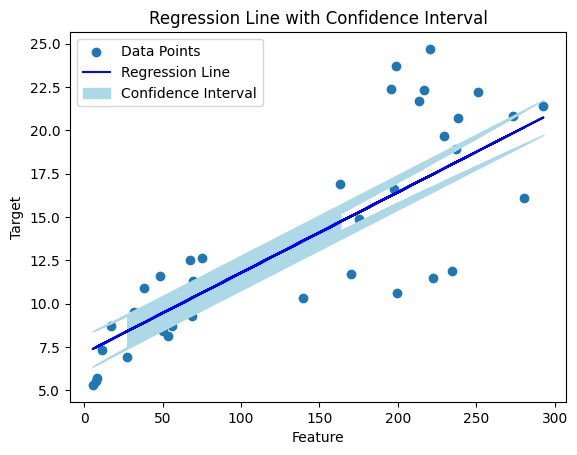

In [19]:
# Ensure X_test is a NumPy array and flatten it for plotting
X_test_flat = X_test.to_numpy().flatten() if isinstance(X_test, pd.DataFrame) else X_test.flatten()

# Scatter plot of test data
plt.scatter(X_test_flat, y_test, label='Data Points')

# Regression line
plt.plot(X_test_flat, y_pred, color='blue', label='Regression Line')

# Plot confidence intervals
plt.fill_between(X_test_flat, pred_conf_int[:, 0], pred_conf_int[:, 1], color='lightblue', label='Confidence Interval')

# Add labels and title
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.title('Regression Line with Confidence Interval')
plt.show()


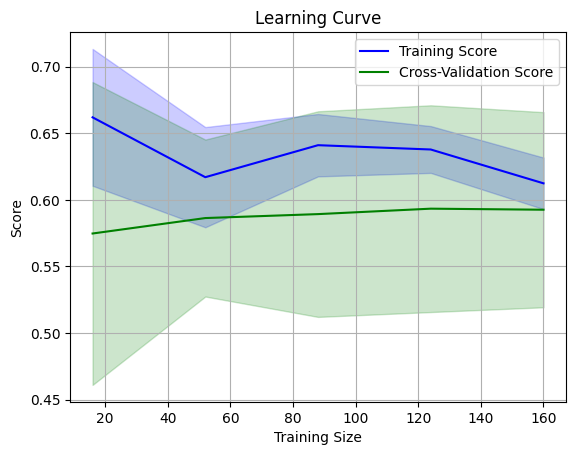

In [22]:
#ADVANCED VISUALIZATION 

#Generating Learning Curve

from sklearn.model_selection import learning_curve

# Use the dataset (X, y) and compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)


# Compute the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green')


# Plot the standard deviation as a filled region
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)


# Labels and title
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

